<h3> This notebook shows that the bins_per_second parameter for auto_channel_mask should negligible affect the result of channel masking.
</h3>

In [1]:
from miv.io import*
folder_path: str = './2022-03-10_16-19-09'
data_man = DataManager(folder_path)

In [2]:
from miv.signal.filter import ButterBandpass
band_filter = ButterBandpass(300, 3000)

from miv.signal.spike import ThresholdCutoff
threshold_detector = ThresholdCutoff()

with data_man[1].load() as (sig, times, samp):
    filteredSig = band_filter(sig, samp)
    exp2Spikes = threshold_detector(filteredSig, times, samp)

100%|██████████| 64/64 [00:02<00:00, 26.23it/s]


(<AxesSubplot:xlabel='Time (s)'>, <Axes:ylabel='count'>, <Axes:>)

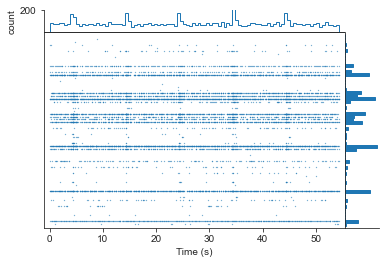

In [3]:
from viziphant.rasterplot import*
rasterplot_rates(exp2Spikes, markerargs={'marker':'.','markersize': 0.5})

The rasterplot and histogram above shows the spikes of the unmasked band-filtered signals. 
___
Now, we call the auto_channel_mask method with various bins_per_second values:

In [4]:
data_man1 = DataManager(folder_path)
data_man10 = DataManager(folder_path)
data_man100 = DataManager(folder_path)
data_man1000 = DataManager(folder_path)
data_man10000 = DataManager(folder_path)
data_man100000 = DataManager(folder_path)

In [5]:
data_man1.auto_channel_mask_v4(band_filter, threshold_detector, bins_per_second=1)
data_man10.auto_channel_mask_v4(band_filter, threshold_detector, bins_per_second=10)
data_man100.auto_channel_mask_v4(band_filter, threshold_detector, bins_per_second=100)
data_man1000.auto_channel_mask_v4(band_filter, threshold_detector, bins_per_second=1000)
data_man10000.auto_channel_mask_v4(band_filter, threshold_detector, bins_per_second=10000)
data_man100000.auto_channel_mask_v4(band_filter, threshold_detector, bins_per_second=100000)

100%|██████████| 64/64 [00:02<00:00, 24.69it/s]


In [9]:
data_men = [data_man1, data_man10, data_man100, data_man1000, data_man10000, data_man100000]
masked_spikes = []
for man in data_men:
    with man[2].load() as (sig, times, samp):
        masked_spikes.append(threshold_detector(sig, times, samp))

100%|██████████| 52/52 [00:01<00:00, 42.14it/s]


(<AxesSubplot:xlabel='Time (s)'>, <Axes:ylabel='count'>, <Axes:>)

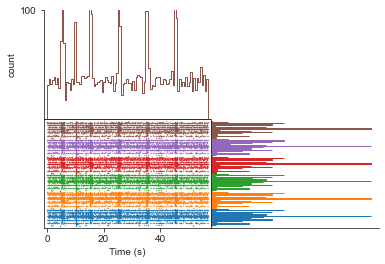

In [15]:
from viziphant.rasterplot import*
rasterplot_rates(masked_spikes, histscale=0.5, markerargs={'marker':'.','markersize': 0.5})

We can see from the above rasterplot that the spikes look identical. The histograms completely overlap.